In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols

plt.rcParams['figure.figsize'] = [16, 12]

# Load data

## The Advertising dataset

In [2]:
df_advertising = pd.read_csv("Data/Advertising.csv")
df_advertising = df_advertising.drop("Unnamed: 0", axis=1)
df_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


## The Credit dataset

In [4]:
df_credit = pd.read_csv('Data/Credit.csv', usecols=list(range(1,12)))
df_credit['Student_dummy'] = df_credit.Student.map({'No':0, 'Yes':1})
df_credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student_dummy
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Income           400 non-null float64
Limit            400 non-null int64
Rating           400 non-null int64
Cards            400 non-null int64
Age              400 non-null int64
Education        400 non-null int64
Gender           400 non-null object
Student          400 non-null object
Married          400 non-null object
Ethnicity        400 non-null object
Balance          400 non-null int64
Student_dummy    400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


## The Auto dataset

In [6]:
df_auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [7]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### [3.1]

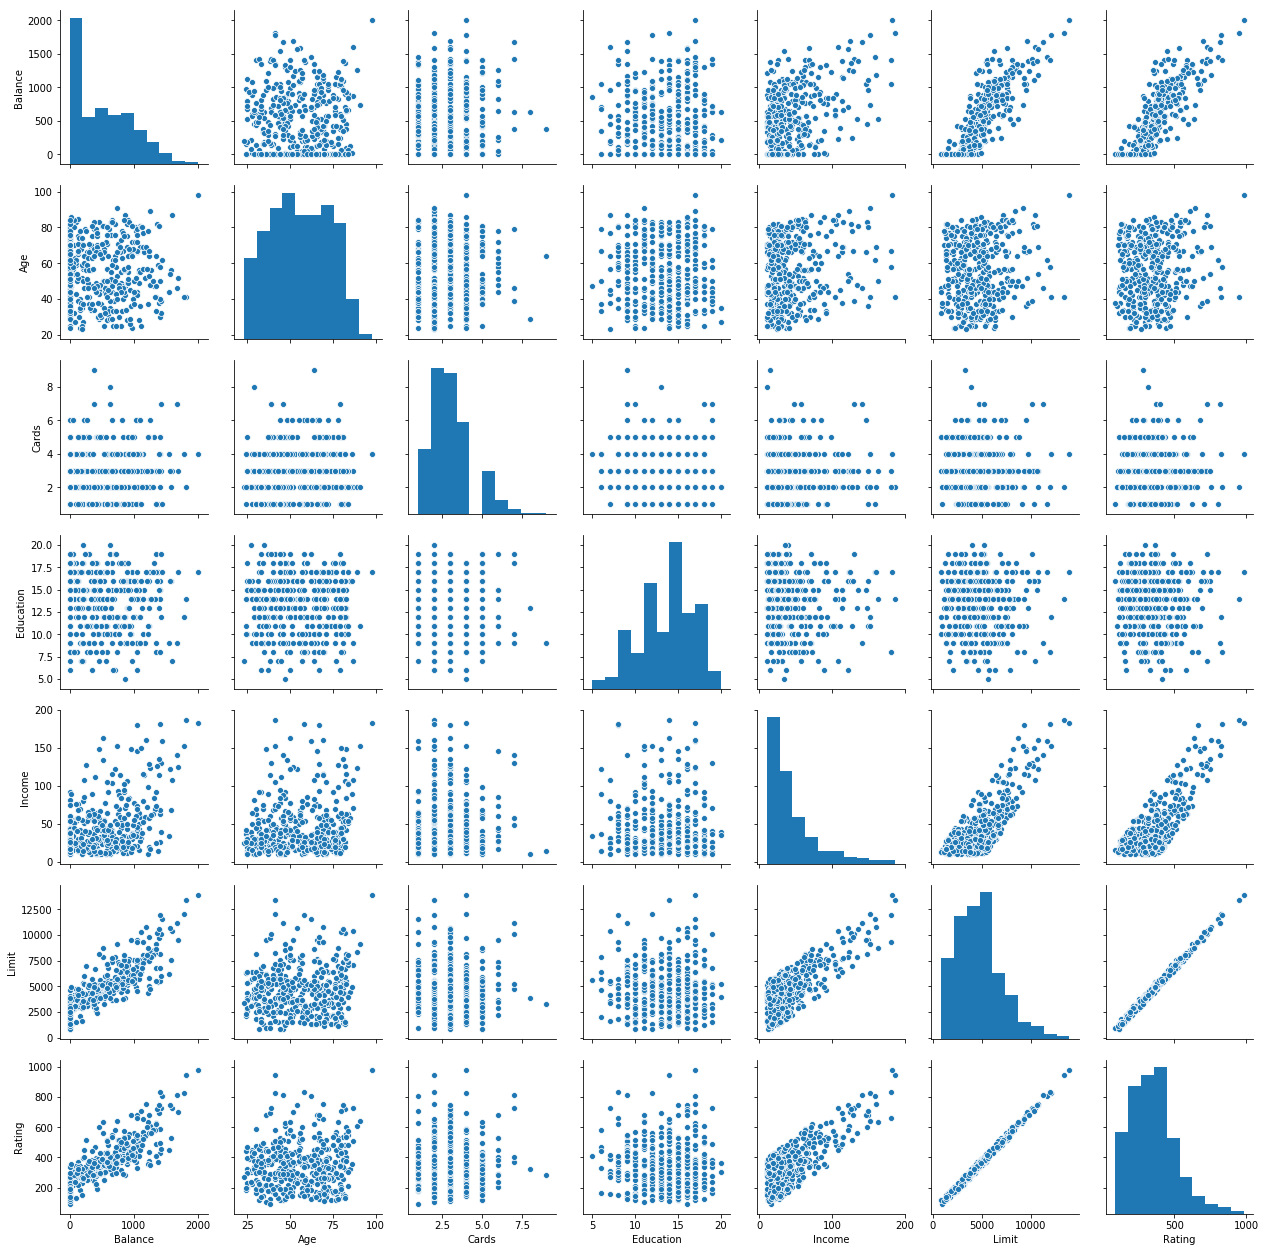

In [8]:
sns.pairplot(df_credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

### [3.2]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


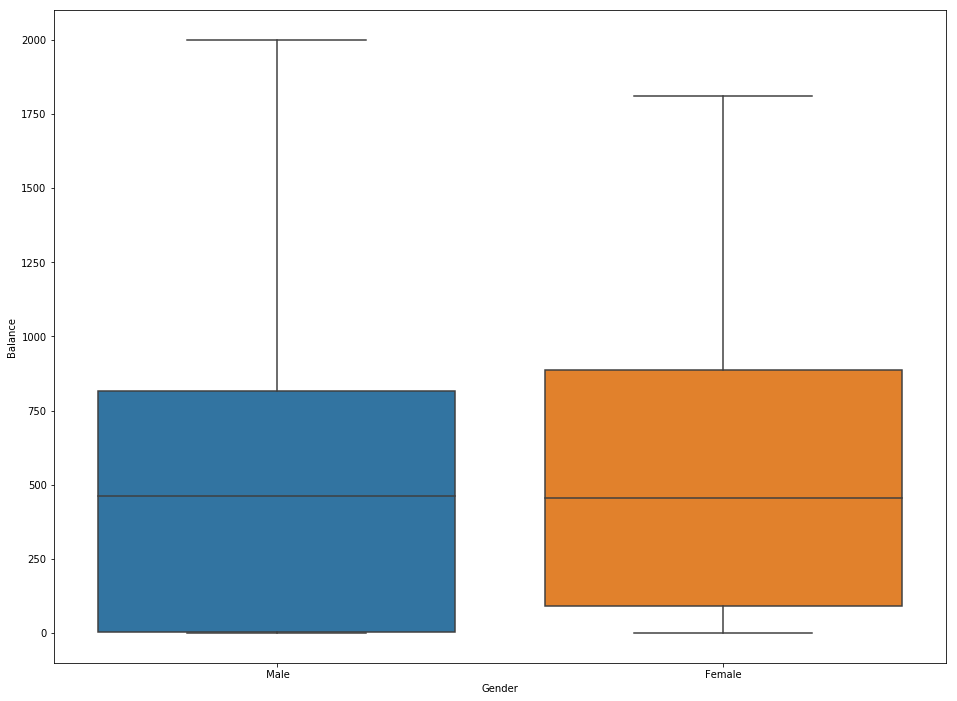

In [20]:
sns.boxplot(x='Gender', y='Balance', data=df_credit)
gender_regress = ols('Balance ~ Gender', df_credit).fit()
gender_regress.summary().tables[1]

### [3.3]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


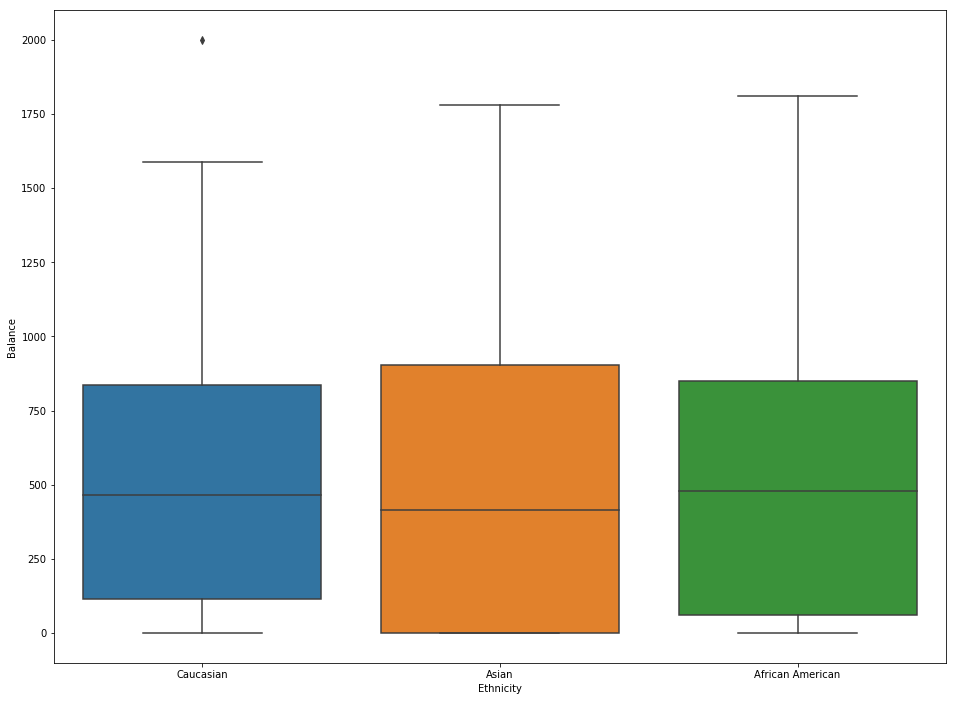

In [21]:
sns.boxplot(x='Ethnicity', y='Balance', data=df_credit)
ethnicity_regress = ols('Balance ~ Ethnicity', df_credit).fit()
ethnicity_regress.summary().tables[1]

### [3.4]

In [11]:
inter_regress = ols('Sales ~ TV + Radio + TV*Radio', df_advertising).fit()
inter_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 25 Jan 2019   Prob (F-statistic):          6.68e-146
Time:                        17:28:05   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### [3.5]

In [12]:
student_no_inter_regress = ols('Balance ~ Income + Student_dummy', df_credit).fit()
student_inter_regress = ols('Balance ~ Income + Income*Student_dummy', df_credit).fit()

print('Regression 1 - without interaction term')
print(student_no_inter_regress.summary())
print('\nRegression 2 - with interaction term')
print(student_inter_regress.summary())

Regression 1 - without interaction term
                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           9.64e-29
Time:                        17:28:05   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Interc

### [3.6]

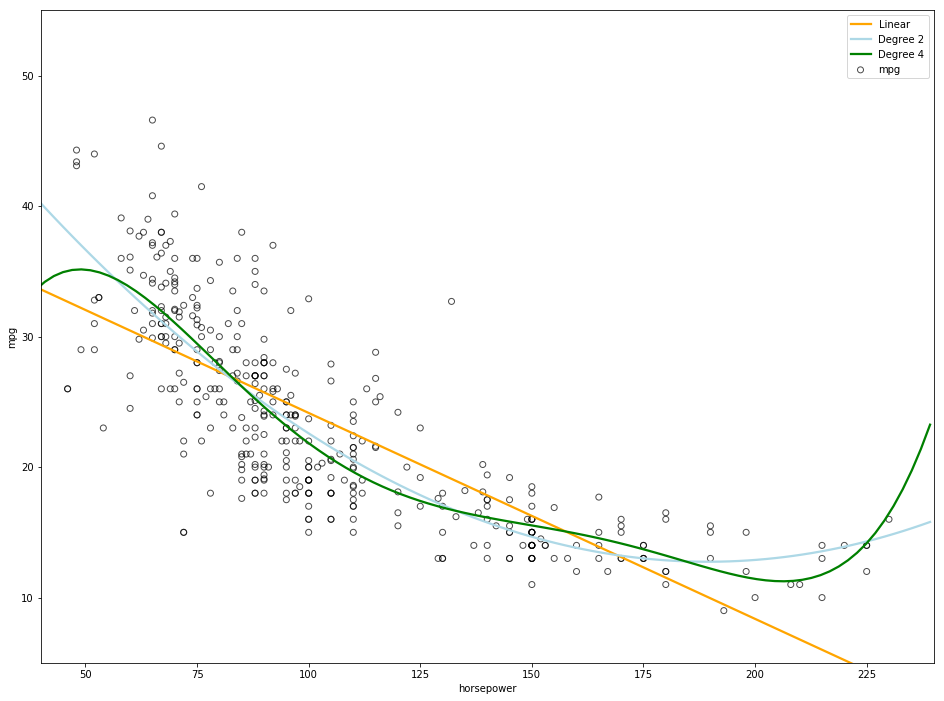

In [22]:
plt.scatter(df_auto.horsepower, df_auto.mpg, facecolors='None', edgecolors='k', alpha=.7) 
sns.regplot(df_auto.horsepower, df_auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(df_auto.horsepower, df_auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(df_auto.horsepower, df_auto.mpg, ci=None, label='Degree 4', order=5, scatter=False, color='green')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [14]:
poly_regress_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())
random_search = GridSearchCV(poly_regress_pipeline, {
    'polynomialfeatures__degree': range(1, 10)
}, cv=3, verbose=1)
random_search.fit(df_auto.horsepower.values.reshape(-1, 1), df_auto.mpg.values)
random_search.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished


{'polynomialfeatures__degree': 4}

# Laboratories

The Boston dataset variables description:
```
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
```

In [15]:
df = pd.read_csv("Data/Boston.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


### 1. Investigate interaction between lstat and age. Find other significant interactions and their interpretation.

### 2. Plot below suggests non-linear relation between lstat and medv. Fit linear and polynomial regressions (medv on lstat and lstat^2) and compare their R^2 statistic.

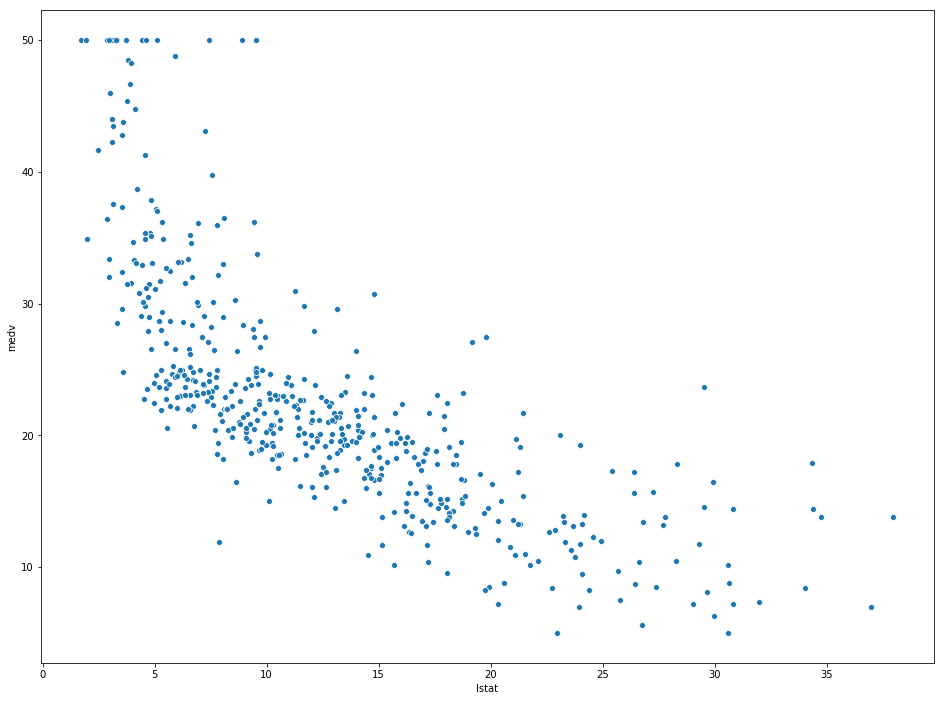

In [23]:
sns.scatterplot(data=df, x='lstat', y='medv')

### 3. Fine the best polynomial degree hyper-parameter for medv on lstat polynomial regression. Plot the model.

### 4. Does boarder with Charles River change value of the properties? Investigate it!